<a href="https://colab.research.google.com/github/DiegoJove/Portaf-lio/blob/main/C%C3%B3digos/Ayudant%C3%ADa_RK4_2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

https://excalidraw.com/#json=66xY39_9K3tsklF6ne9Iq,g56JeXBIK73guRkpZOB6yw

<h1>Método Runge Kutta de Órden 4</h1>
$$
\begin{align}
k_1 &= f(x_n,y_n)\\
k_2 &= f(x_n + \frac{h}{2},y_n + k_1\cdot \frac{h}{2})\\
k_3 &= f(x_n + \frac{h}{2},y_n + k_2\cdot \frac{h}{2})\\
k_4 &= f(x_n + h,y_n + k_3\cdot h)\\
y_{n+1} &= y_n + \frac{h}{6} \cdot (k_1 + 2k_2 + 2k_3 + k4)
\end{align}
$$

# Péndulo

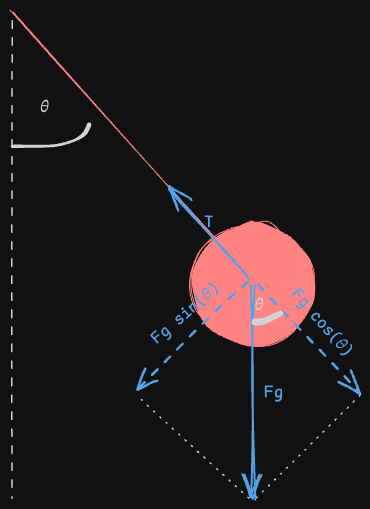

$$
\begin{align}
\sum F &= m\cdot \frac{d^2}{dt^2}\vec{r}\\
\\
F_g \sin{\theta} &= m\cdot \frac{d^2}{dt^2} \left(l\cdot\vec{ \theta}\right)\\
\\
m\cdot g \sin{\theta} &= ml\cdot \ddot{\theta }\\
\\
⇒  &\boxed{ \ddot{\theta} - \frac{g}{l} \sin{\theta} = 0}
\end{align}
$$

El método RK4 funciona siempre y cuando tenga la forma
$$y' = f(x,y)$$
Para sistemas de órdenes superiores podemos hacer siempre:
$$
Y' = \vec{F}(x,Y)
$$
$$
Y = \left(\matrix{{y}\\{y'}\\{y''}\\...}\right)
$$

En el caso del péndulo se tiene:
$$
\frac{d}{dt}{\Theta} = \frac{d}{dt}\left(\matrix{{\theta}\\{\omega}} \right)= \left(\matrix{{\frac{d}{dt}\theta}\\{\frac{d}{dt}\omega}} \right)  = \left(\matrix{{\omega}\\{\frac{g}{l}}\sin{\theta}} \right)
$$

$$
\dot\Theta = \vec{F}(t, \Theta)
$$
Quedando así de primer órden y pudiendose aproximar la solución con RK4 con un valor inicial dado

In [ ]:
dt = .1
T0 = 30
t = np.arange(0, T0+dt, dt)

o0 = np.pi/1.01
w0 = 0
l = 1

O_ = lambda t, o, w: [w, -9.81/l * np.sin(o)]
o = []
w = []
o.append(o0)
w.append(w0)

for i in range(len(t)-1):
  k1 = O_(t[i],        o[i],              w[i])
  k2 = O_(t[i] + dt/2, o[i] + k1[0]*dt/2, w[i] + k1[1]*dt/2)
  k3 = O_(t[i] + dt/2, o[i] + k2[0]*dt/2, w[i] + k2[1]*dt/2)
  k4 = O_(t[i] + dt,   o[i] + k3[0]*dt,   w[i] + k3[1]*dt)

  o.append(o[i] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])*dt/6)
  w.append(w[i] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])*dt/6)
df = pd.DataFrame({'t':t, 'o':o, 'w':w, 'x':l*np.sin(o), 'y': -l*np.cos(o)})

In [ ]:
fig = px.line(
    df, x='t', y=['o', 'w'],
    title=r'$\text{Solución a las ecuaciones diferenciables }\\ \dot{\theta} = \omega \\ \dot{\omega}=\frac{g}{l}\cdot \sin{\omega}$'
              )
new = {'o':r'$\theta$', 'w': r'$\omega$'}
fig.for_each_trace(lambda t: t.update(name = new[t.name]))
fig.show()


In [ ]:
fig = px.scatter(df, x='x', y='y', animation_frame='t',)
fig.update_traces(marker=dict(size=20),)
fig.update_layout(
    yaxis_scaleanchor="x",
    yaxis_scaleratio=1,
    xaxis_range=[-1.5, 1.5],
    yaxis_range=[-1.5, 1],
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
fig.show()

#Ayudantía Péndulo 2.0

In [ ]:
t = 0
dt = .03
l = 1

O0 = np.array([np.pi/1.01, 0])
O_ = lambda o, w: np.array([w,-9.81/l*np.sin(o)])

P_data = pd.DataFrame({'t': [t], 'o':[O0[0]], 'w':[O0[1]], 'x': [l*np.sin(O0[0])], 'y': [-l*np.cos(O0[0])]})

while t<30:
  K1 = O_(*O0)
  K2 = O_(*(O0+K1*dt/2))
  K3 = O_(*(O0+K2*dt/2))
  K4 = O_(*(O0+K3*dt))
  O0 += (K1+2*K2+2*K3+K4)*dt/6
  t += dt
  P_data.loc[len(P_data)] = [t, *O0, l*np.sin(O0[0]), -l*np.cos(O0[0])  ]




In [ ]:
fig = px.scatter(P_data, x='x', y='y', animation_frame='t',)
fig.update_traces(marker = {'size':10})
fig.update_layout(
    yaxis_scaleanchor="x",
    yaxis_scaleratio=1,
    xaxis_range=[-1.1, 1.1],
    yaxis_range=[-1.1, 1.1],
)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.show()

In [ ]:
px.line(df, x='t', y=['o','w'])

# Problema de los tres cuerpos

In [ ]:
# Problema de los tres cuerpos
x1, y1, vx1, vy1 = 0,0,0,-100
x2, y2, vx2, vy2  = 86,50,-86,50
x3, y3, vx3, vy3  = 86,-50,86,50
m1, m2, m3 = 100,100,100

def PTC(x1,x2,x3,y1,y2,y3,vx1,vx2,vx3,vy1,vy2,vy3,m1,m2,m3, G=6.67e-11):
  dt = .1
  T0 = 300
  t = np.arange(0, T0+dt, dt)


  def G1(x1,y1,x2,y2, m1, m2,):
    d = ((x1-x2)**2+(y1-y2)**2)**.5
    f = G * m1*m2/d**2
    fx = f * -(x1-x2)/d
    fy = f * -(y1-y2)/d
    return np.array([fx, fy])

  # X' =  | P = [px,py] |'  = |  V  |
  #       | V = [vx,vy] |   = | F/m |

  def X_(t, Xn, i):
    tii,x,y,vx,vy = Xn.T
    if i == 1:
      F = G1(x[0],y[0],x[1],y[1],m1,m2) + G1(x[0],y[0],x[2],y[2],m1,m3)
      return np.array([0,vx[0],vy[0],F[0]/m1,F[1]/m1])

    elif i == 2:
      F = G1(x[1],y[1],x[2],y[2],m2,m3) + G1(x[1],y[1],x[0],y[0],m2,m1)
      return np.array([0,vx[1],vy[1],F[0]/m2,F[1]/m2])

    elif i == 3:
      F = G1(x[2],y[2],x[1],y[1],m3,m2) + G1(x[2],y[2],x[0],y[0],m3,m1)
      return np.array([0,vx[2],vy[2],F[0]/m3,F[1]/m3])

    else:
      fx,fy = 0,0
      return np.array([0,vx,vy,fx,fy])

  X = pd.DataFrame({
      't':[0]*3,
      'x':[x1,x2,x3],
      'y':[y1,y2,y3],
      'vx':[vx1,vx2,vx3],
      'vy':[vy1,vy2,vy3],
  })

  for i in range(len(t)-1):
    Xn = X.iloc[-3::].values
    X1 = Xn[0]
    X2 = Xn[1]
    X3 = Xn[2]

    K11 = X_(t[i], Xn, 1)
    K21 = X_(t[i] + dt/2, Xn + K11*dt/2, 1)
    K31 = X_(t[i] + dt/2, Xn + K21*dt/2, 1)
    K41 = X_(t[i] + dt  , Xn + K31*dt, 1)
    X.loc[len(X)] = X1 + (K11 + 2*K21 + 2*K31 + K41)*dt/6 + np.array([dt,0,0,0,0])

    K12 = X_(t[i], Xn, 2)
    K22 = X_(t[i] + dt/2, Xn + K12*dt/2, 2)
    K32 = X_(t[i] + dt/2, Xn + K22*dt/2, 2)
    K42 = X_(t[i] + dt  , Xn + K32*dt, 2)
    X.loc[len(X)] = X2 + (K12 + 2*K22 + 2*K32 + K42)*dt/6  + np.array([dt,0,0,0,0])

    K13 = X_(t[i], Xn, 3)
    K23 = X_(t[i] + dt/2, Xn + K13*dt/2, 3)
    K33 = X_(t[i] + dt/2, Xn + K23*dt/2, 3)
    K43 = X_(t[i] + dt, Xn + K33*dt, 3)
    X.loc[len(X)] = X3 + (K13 + 2*K23 + 2*K33 + K43)*dt/6 + np.array([dt,0,0,0,0])
  return X

In [ ]:
X = PTC(
    0, #X1
    86, #X2
    86, #X3
    0, #y1
    50, #y2
    -50, #y3

    0, #vx1
    -8.6, #vx2
    8.6, #vx3

    -10, #vy1
    5, #vy2
    5, #vy3

    1e2, #m1
    1e2, #m2
    1e2, #m3
    6.67e-11 #G
    )
fig = px.scatter(
    X,
    x= 'x',
    y='y',
    animation_frame='t'
    )
fig.update_traces(marker=dict(size=20),)
fig.update_layout(
    yaxis_scaleanchor="x",
    yaxis_scaleratio=1,
    xaxis_range=[-1e3, 1e3],
    # yaxis_range=[-1.5, 1],
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
fig.show()



# Diferencias Finítas

$$
}
$$